In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

%matplotlib inline

In [2]:
df = pd.read_csv("./data/winequality-red.csv")
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [3]:
## Update the dataframe by assigning the quality as 1 or 0 based on the score.
quality_guide = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}

In [4]:
df['quality'] = df['quality'].replace(quality_guide)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [5]:
feature_count = df.shape[1] - 1
rows_list = []
for i in range(len(df)):
    new_row = np.array(df.iloc[i,0:feature_count])
    rows_list.append(new_row)
    
x = np.array(rows_list)
y = np.array(df.iloc[:,feature_count])
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [6]:
n = len(y)
randy = np.random.default_rng()
idx = np.arange(n)
randy.shuffle(idx)

## Splits the data into 80% training and 20% validation
train_idx = idx[:int(n*.8)]
val_idx = idx[int(n*.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

training_lenth = len(x_train)
validation_length = len(x_val)
print(f"The training data has {training_lenth} observations.")
print(f"The validation data has {validation_length} observations.")

The training data has 1279 observations.
The validation data has 320 observations.


In [7]:
sns.set_theme(palette="flare")
sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

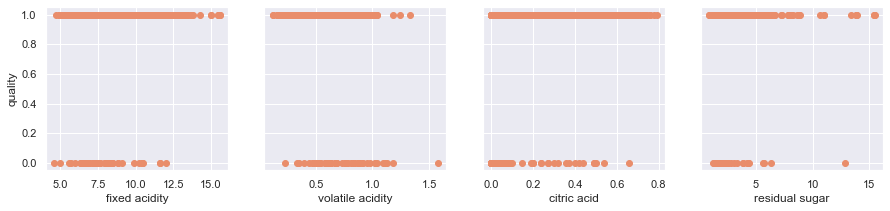

In [12]:
## plots the data from the first four features in side by side graphs
columns = df.columns.tolist()
x_features = columns[:feature_count]
y_feature = columns[feature_count]

fig, ax=plt.subplots(1,4,  figsize=(15,3),  sharey=True)

for i in range(4):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel(y_feature)
plt.show()

In [13]:
## plots logistic data with two axis
def plot_data(X, y, ax, pos_label, neg_label, s=80, loc='best' ):

    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)
    neg = neg.reshape(-1,)

    ax.scatter(X[pos, 0], X[pos, 1], marker='o', s=s, label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='x', s=s, label=neg_label, lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

ValueError: too many values to unpack (expected 2)

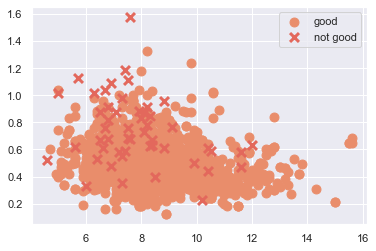

In [14]:
fig, ax = plt.subplots()
plot_data(x_train, y_train, ax, "good", "not good", s=80)
x_label,y_label = x_features
plt.ylabel(y_label) 
plt.xlabel(x_label) 
plt.legend(loc="upper right")
plt.show()

## Gradient Descent Code

In [15]:
def compute_cost(x, y, w, b):

    m, n = x.shape
    
    s = 0
    for i in range(m):
        epsilon = 1e-15
        xi = x[i]
        yi = y[i]
        zi = (np.dot(w,xi)) + b
        yhat = 1/(1 + np.exp(-zi))
        yhat = np.clip(yhat, epsilon, 1- epsilon)
        loss = (-yi)*(np.log(yhat))-(1-yi)*(np.log(1-yhat))
        if not np.isnan(loss):
            s = s + loss
    
    total_cost =  s / m

    return total_cost

In [16]:
def update_wb(x, y, w_init, b_init, alpha): 

    m, n = x.shape
    
    s =  0
    for i in range(m):
        xi = x[i]
        yi = y[i]
        zi = (np.dot(w_init,xi)) + b_init
        function = 1/(1 + np.exp(-zi))
        difference = (function - yi)*xi
        
        s = s + difference
        
        dj_dw = s / m 
        w = w_init - (alpha * dj_dw)
        
    s = 0
    for i in range(m):
        xi = x[i]
        yi = y[i]
        zi = (np.dot(w_init,xi)) + b_init
        function = 1/(1 + np.exp(-zi))
        difference = (function - yi)
        
        s = s + difference
        
        dj_db = s / m 
        b = b_init - (alpha * dj_db)

    return w, b

In [17]:
def add_results(J, w, b, iterations):
    new_row = {'iteration': iterations, 'J': J, 'w': w, 'b': b}
    results.loc[len(results)] = new_row   

In [18]:
def gradient_descent(x, y, w, b, alpha, iterations): 

    # number of training examples
    m = len(x)
    
    for i in range(iterations):

        # Compute Cost
        J = compute_cost(x, y, w, b) 
        add_results(J, w, b, i)

        # Update Parameters using w, b, alpha and gradient
        w, b = update_wb(x, y, w, b, alpha)                 
        
    return results

## Run Gradient Descent

In [39]:
columns = ['iteration', 'J', 'w', 'b']
results = pd.DataFrame(columns = columns)

np.random.seed(1)
initial_w = 0.01 * (np.random.rand(feature_count) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 1000
alpha = 0.0001

results = gradient_descent(x_train, y_train, initial_w, initial_b, 
                                    alpha, iterations)

In [40]:
row = results.loc[results['J'].idxmin()]
model_w = row['w']
model_b = row['b']
print(model_w, model_b)
print(row)

[ 0.14799899  0.01025207  0.00034407  0.03847202 -0.00207389  0.11647158
  0.29220592  0.01559691  0.05551261  0.01167738  0.18459367] -7.98279716686229
iteration                                                  999
J                                                     0.412085
w            [0.14799899257997154, 0.010252072166941585, 0....
b                                                    -7.982797
Name: 999, dtype: object


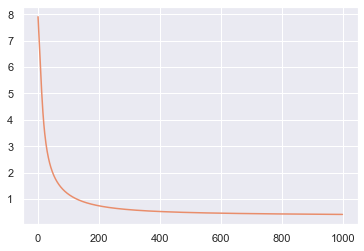

In [41]:
## Check for convergence
plt.plot(results['iteration'],results['J'])

## Look at the Results

In [45]:
def predict(x, w, b): 

    m, n = x.shape   
    p = np.zeros(m)
   
    for i in range(m):   
        xi = x[i]
        yi = y[i]
        zi = np.dot(w, xi) + b
        
        function = 1/(1 + np.exp(-zi)) 
        
        # Apply the threshold to determine True or False, 1 or 0
        p[i] = int(function >= 0.5)
        
    return p

In [46]:
y_prediction = predict(x_val, model_w, model_b)

ValueError: too many values to unpack (expected 2)

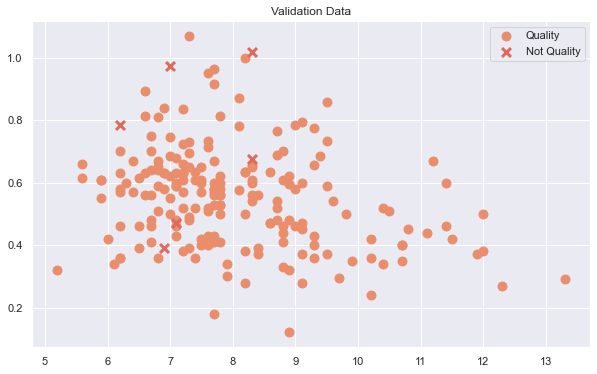

In [47]:
fig, ax = plt.subplots(figsize = (10,6))
plot_data(x_val[1:200], y_val[1:200], ax, pos_label="Quality", neg_label="Not Quality")
plt.title('Validation Data')
x_label,y_label = x_features
plt.ylabel(y_label) 
plt.xlabel(x_label) 
plt.legend(loc="upper right")
plt.show()

ValueError: too many values to unpack (expected 2)

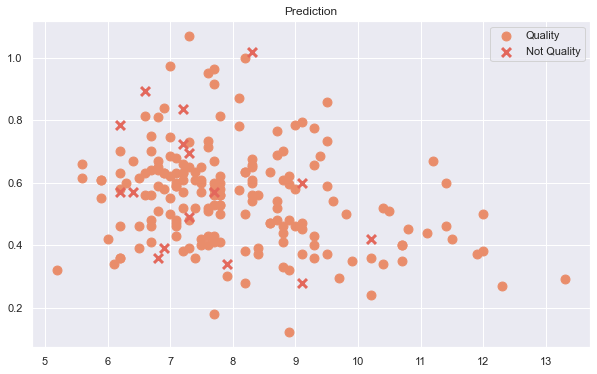

In [48]:
fig, ax = plt.subplots(figsize = (10,6))
plot_data(x_val[1:200], y_prediction[1:200], ax, pos_label="Quality", neg_label="Not Quality")
plt.title('Prediction')
x_label,y_label = x_features
plt.ylabel(y_label) 
plt.xlabel(x_label) 
plt.legend(loc="upper right")
plt.show()

## Predict One Data Point

In [49]:
matches = y_val == y_prediction  # This returns a boolean array

# Calculate the percentage of matches
percentage_match = np.sum(matches) / len(y_val) * 100

print(f"Percentage of matching elements: {percentage_match}%")

Percentage of matching elements: 91.875%


In [50]:
print(y_prediction)

[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
